##Mathematical Transformation

Some Machine learning algo perform better on normal data i.e Linear,Logistic when we work on this algorithm we try to make data distribution in normal form.


For makeing data into a normasl form we manily use:

a) Log transformation:- Not use in -Ve value, use in right skeweed data

b) Recipocal Transformation(1/X):- All big value convert in small and small value convert in big

C) Power(s-Quare or sqrt) (X^2):- used in left skeweed data

d) Box- Cox


In sklearn libraries there are three transforamtion

Function Trans-> using this we can perform (log,recipol,sq/sqrt,custom)

Power Trans-> using this we can perform (box-cox)

Quantile trans Not covered

How to find if data distribution is Normal or Not?

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 

from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('/content/tatinic-train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2,random_state=35)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


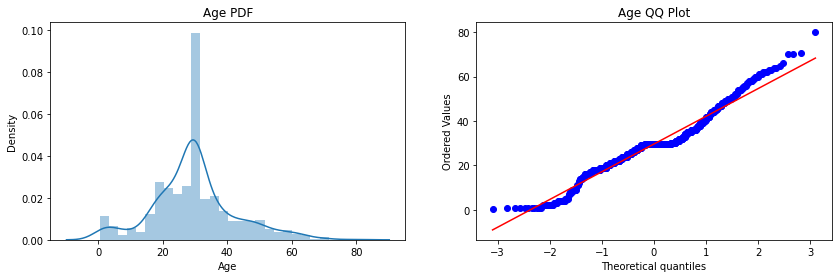

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


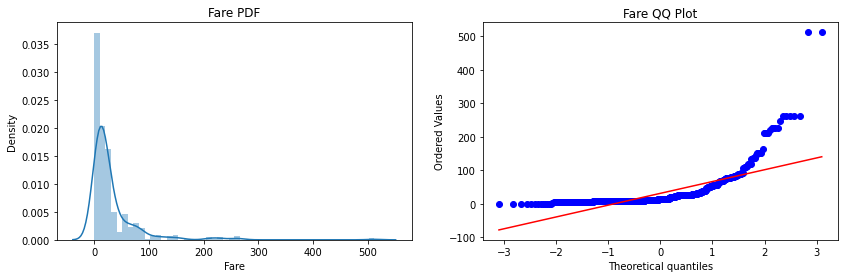

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [12]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

In [13]:
lr.fit(X_train,y_train)
clf.fit(X_train,y_train)

lr_pred=lr.predict(X_test)
clf_pred=clf.predict(X_test)

In [14]:
print("Accuracy Score for Logistic Regression: ",accuracy_score(y_test,lr_pred))
print("Accuracy Score for Decision Tree Classifier: ",accuracy_score(y_test,clf_pred))

Accuracy Score for Logistic Regression:  0.664804469273743
Accuracy Score for Decision Tree Classifier:  0.5754189944134078


In [15]:
trf = FunctionTransformer(func=np.log1p) # mostly np.log1p is used its add(n+1) in column and apply this but np.logp don't do that

In [16]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [17]:
lr.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)

lr_pred=lr.predict(X_test_transformed)
clf_pred=clf.predict(X_test_transformed)

print("Accuracy Score after funs trans Logistic Regression: ",accuracy_score(y_test,lr_pred))
print("Accuracy Score after funs trans Decision Tree Classifier: ",accuracy_score(y_test,clf_pred))

Accuracy Score after funs trans Logistic Regression:  0.6703910614525139
Accuracy Score after funs trans Decision Tree Classifier:  0.6089385474860335


Doing the cross validation to check after transformation result is right or not?

In [18]:
X_transformed = trf.fit_transform(X)


print("Accuracy Score after cross Validation Logistic Regression: ",np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print("Accuracy Score after cross Validation Decision Tree Classifier: ",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))

Accuracy Score after cross Validation Logistic Regression:  0.678027465667915
Accuracy Score after cross Validation Decision Tree Classifier:  0.6610986267166042


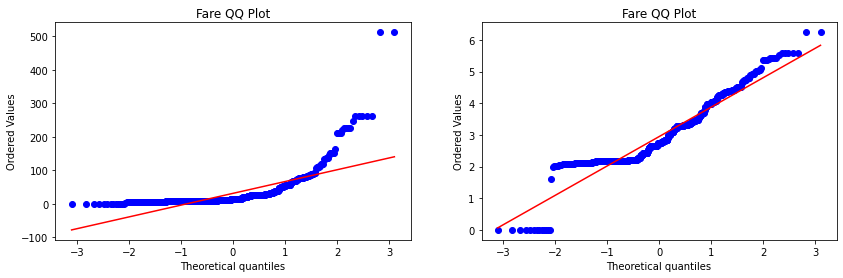

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

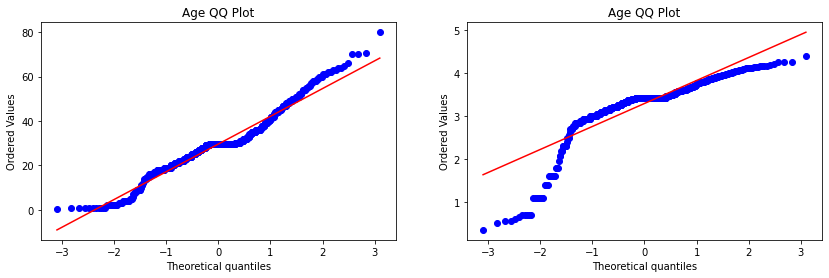

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [23]:
trf2 = ColumnTransformer (transformers=[
        ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [24]:
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2= trf2.transform(X_test)

In [28]:
lr.fit(X_train_transformed2,y_train)
clf.fit(X_train_transformed2,y_train)

lr_pred2=lr.predict(X_test_transformed2)
clf_pred2=clf.predict(X_test_transformed2)

print("Accuracy Score after funs trans Logistic Regression: ",accuracy_score(y_test,lr_pred2))
print("Accuracy Score after funs trans Decision Tree Classifier: ",accuracy_score(y_test,clf_pred2))

Accuracy Score after funs trans Logistic Regression:  0.664804469273743
Accuracy Score after funs trans Decision Tree Classifier:  0.5810055865921788


In [29]:
X_transformed2 = trf2.fit_transform(X)


print("LR",np.mean(cross_val_score(lr,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6655930087390761


In [30]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6712609238451936


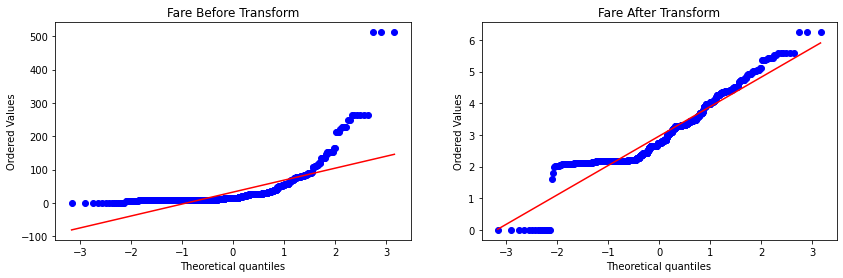

In [38]:
Sqrt = lambda X:X**1/2
square = lambda X:X**2
normal = lambda X:X
log1= np.log1p


apply_transform(log1)